In [1]:
import torch
import torchvision
from torchvision import transforms, datasets, models
from torchvision.utils import save_image

import torch.optim as optim


import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import math


import os 
import glob
import time
import cv2

from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt

import imageio



In [2]:
#%matplotlib qt
%matplotlib inline
img_height = 256
img_width = 256

tensor(255, dtype=torch.uint8)


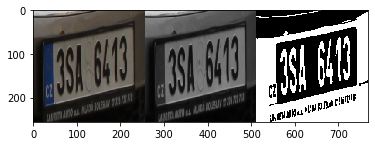

In [3]:
########IMPORT RANDOM IMAGE q1########

img = cv2.imread(glob.glob("./CollatedDataCleaned/*")[np.random.randint(70)], cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (img_width, img_height))
q1 = torch.tensor(img)

######### q1 properties #########
qg = cv2.cvtColor(q1.numpy(), cv2.COLOR_RGB2GRAY)

############# IMAGE PROCESSING IDEA-SOUP HERE #################

#SUPER USEFUL ONLINE COLOR CALCULATOR: http://colorizer.org/
#NOTE:  OpenCV uses HSV ranges between (0-180, 0-255, 0-255)

qi = q1
qi = qi.numpy() 

qi = cv2.cvtColor(qi, cv2.COLOR_RGB2LAB)


'''    
crmask = cv2.inRange(qi, np.array([0, 0, ]),np.array([180,255, ])).astype(np.uint8)
qi[crmask>0] = (0,0,255)
print(len(qi[crmask>0]))

'''

ql = torch.tensor(qi[:,:,0])
ql= torch.stack((ql,ql,ql),2)
        
qL = torch.tensor(qi[:,:,0])
for k in range(256):
    for m in range(256):
        qL[k,m] = ((qL[k,m]/127.5 - 1) * 2)
qL = torch.stack((qL,qL,qL),2)



qi = torch.tensor(qi)

print(qL.max())
##### DISPLAY IT ALL ##########

d = torch.cat((q1, ql, qL),1)
#print(qL.float().mean())
plt.imshow(d)


In [13]:
def make_training_images(save_path = "./grayTest/", img_height = 256, img_width = 256):
    
    
    try:
        os.mkdir(save_path)
    
    except Exception as e:
        print('Mkdir failed. %s. Reason: %s' % (save_path, e))
    
    j=0
    for i in tqdm(glob.glob("./CollatedDataCleaned/*")):

        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (img_width, img_height))
        q1 = torch.tensor(img)

        qi = q1
        qi = qi.numpy() 

        qi = cv2.cvtColor(qi, cv2.COLOR_RGB2LAB)

        q1 = cv2.cvtColor(q1.numpy(), cv2.COLOR_RGB2GRAY)

        qL = qi[:,:,0]
        
        for k in range(256):
            for m in range(256):
                    qL[k,m] = (((qL[k,m]/127.5 - 1) * 2)).astype(np.uint8)
        
        
                
        
        q1fh = cv2.flip(q1, 1)
        qLfh = cv2.flip(qL, 1)

        q1fv = cv2.flip(q1, 0)
        qLfv = cv2.flip(qL, 0)

        q1fhv = cv2.flip(q1, -1)
        qLfhv = cv2.flip(qL, -1)

        q = np.concatenate((qL, q1), 1)
        qfh = np.concatenate((qLfh, q1fh), 1)
        qfv = np.concatenate((qLfv, q1fv), 1)
        qfhv = np.concatenate((qLfhv, q1fhv), 1)

        img_name = str(j)
        #print(save_path + img_name + ".png")

        img_save_path = save_path + img_name + ".png"
        img_save_path_fh = save_path + img_name + "_fh.png"
        img_save_path_fv = save_path + img_name + "_fv.png"
        img_save_path_fhv = save_path + img_name + "_fhv.png"

        imageio.imwrite(img_save_path, q)
        imageio.imwrite(img_save_path_fh, qfh)
        imageio.imwrite(img_save_path_fv, qfv)
        imageio.imwrite(img_save_path_fhv, qfhv)
        j+=1   

        
make_training_images()

Mkdir failed. ./grayTest/. Reason: [WinError 183] Cannot create a file when that file already exists: './grayTest/'


(256, 256)
[[20 21 21 ... 21 18 17]
 [20 20 20 ... 20 18 17]
 [20 20 20 ... 20 18 18]
 ...
 [14 14 14 ...  7  6  7]
 [14 14 14 ...  8  7  7]
 [14 13 14 ...  8  7  7]]
(256, 256)
[[58 57 56 ... 47 47 47]
 [57 56 55 ... 47 46 46]
 [55 55 54 ... 48 47 47]
 ...
 [15 16 16 ... 60 63 63]
 [11 11 12 ... 61 63 62]
 [ 8  9  9 ... 62 63 63]]
(256, 256)
[[49 51 53 ... 73 73 74]
 [49 51 53 ... 73 73 74]
 [47 49 52 ... 73 74 75]
 ...
 [13 12 11 ... 12 12 12]
 [14 13 11 ... 12 12 12]
 [14 13 11 ... 13 12 12]]
(256, 256)
[[38 39 41 ... 82 81 80]
 [42 43 46 ... 79 77 76]
 [49 51 54 ... 74 71 69]
 ...
 [66 66 69 ... 31 26 23]
 [62 62 64 ... 30 27 23]
 [59 60 61 ... 30 27 23]]
(256, 256)
[[54 53 53 ... 61 61 62]
 [54 53 53 ... 61 61 62]
 [54 53 53 ... 62 62 63]
 ...
 [10  9  9 ...  9 12 12]
 [10  9  9 ...  9 12 12]
 [10  9  9 ...  9 12 12]]
(256, 256)
[[105 105 106 ...  65  63  62]
 [106 106 107 ...  62  61  59]
 [107 108 108 ...  56  56  53]
 ...
 [  8   9   9 ...  25  22  22]
 [  8   9   9 ...  26  23

KeyboardInterrupt: 

In [176]:
def make_training_data(image_pairs_path = "./grayTest/"):
    
    
    try:
        os.mkdir(image_pairs_path)
    
    except Exception as e:
        print('Mkdir failed. %s. Reason: %s' % (image_pairs_path, e))
    
    
  
    real_pairs = []
    
    for i in glob.glob(image_pairs_path + "*"):           
    
        img = cv2.imread(i, cv2.IMREAD_UNCHANGED)
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #opencv reads assuming bgr, bgr^2 = rgb hehe
        #img = img.transpose(2,0,1) #channels, height, width
        img = torch.tensor(img).view(-1,256,512)
        
        imgO = img[:,:,:256]
        imgR = img[:,:,256:]
        img = np.concatenate((imgR, imgO), 0)       
   
        real_pairs.append(img)
        
    np.random.shuffle(real_pairs)    
    np.save("dirty_test_data.npy", real_pairs)

    
    
make_training_data()

data = (np.load("dirty_test_data.npy")).astype(np.uint8).astype(np.float32)
dataNormalised = (data/127.5 - 1)
np.save("dirty_test_data.npy",dataNormalised)

Mkdir failed. ./grayTest/. Reason: [WinError 183] Cannot create a file when that file already exists: './grayTest/'


In [85]:
help(imageio.imwrite)

Help on function imwrite in module imageio.core.functions:

imwrite(uri, im, format=None, **kwargs)
    imwrite(uri, im, format=None, **kwargs)
    
    Write an image to the specified file.
    
    Parameters
    ----------
    uri : {str, pathlib.Path, file}
        The resource to write the image to, e.g. a filename, pathlib.Path
        or file object, see the docs for more info.
    im : numpy.ndarray
        The image data. Must be NxM, NxMx3 or NxMx4.
    format : str
        The format to use to read the file. By default imageio selects
        the appropriate for you based on the filename and its contents.
    kwargs : ...
        Further keyword arguments are passed to the writer. See :func:`.help`
        to see what arguments are available for a particular format.



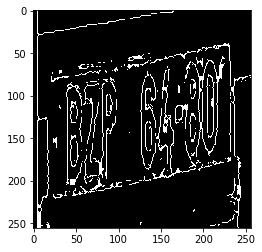

In [105]:
'''
q2 = cv2.Canny(qi.numpy(), 64, 64)
kernel = np.array([[0., 1., 0.], [1., 1., 1.], [0., 1., 0.]],np.uint8)
#kernel = np.ones((2,2),np.uint8)
q2 = cv2.dilate(q2, kernel)
#kernel = np.ones((3,3),np.uint8)
q2 = cv2.morphologyEx(q2, cv2.MORPH_CLOSE, kernel)
plt.imshow(q2, cmap="gray")

'''

In [329]:
#SCRIPT TO ARRANGE DATA, PROBABLY DON'T NEED ANYMORE

'''

def collateData(save_path = "./CollatedData/", img_height = 256, img_width = 256):
    
    
    try:
        os.mkdir(save_path)
    
    except Exception as e:
        print('Mkdir failed. %s. Reason: %s' % (save_path, e))
    
    
    lp_df = pd.read_csv("./trainVal.csv")
    
    j=0
    for i in range(652):
        
        #the even index images are same as odd index ones but colour balanced i think
        if(i%2 == 0):
            
            image_path = lp_df['image_path'][i]
            
            #READ IMAGE
            img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #opencv reads assuming bgr, bgr^2 = rgb hehe
            img = cv2.resize(img, (img_width, img_height))
            
            #REAL PHOTO
            q = img
            
                       
            img_save_path = save_path + str(j) + ".png"
            imageio.imwrite(img_save_path, q)
            j += 1
            

collateData() #putting all images together       

'''

Mkdir failed. ./CollatedDataH/. Reason: [WinError 183] Cannot create a file when that file already exists: './CollatedDataH/'


In [ ]:
#IDEA FOR REMOVING BLURRED IMAGES FROM LARGE DATASETS
#https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html 
#TAKE VARIANCE OF LAPLACIAN OF EACH IMAGE
#NORMALISE ACROSS DATASET
#GET STDEV
#REMOVE BLURRY PICTURES


In [ ]:
'''
#sharpening & brightening
kernel = np.array([[-1,-1,-1], [-1,10,-1], [-1,-1,-1]])
qi = cv2.filter2D(qi, -1, kernel)
'''

In [693]:
'''

q2=torch.tensor(q2)
q2 = q2.view(256, 256)
q2 = torch.stack((q2, q2, q2),2)
print(q2.shape)
q2 = q2.numpy()

#torch.Size([256, 256, 3]).numpy() now


#IDEA: pix2pix performs much better with colorized dataset, 
#separating basic elements along RGB channels(leaving residual 20 colour value like the paper samples do)

#colorize background green
mask = np.zeros((256+2, 256+2), np.uint8)
cv2.floodFill(q2, mask, (0,0), (20,250,20))

#fillPlateBlue
mask = np.zeros((256+2, 256+2), np.uint8)
cv2.floodFill(q2, mask, (128,128), (20,20,250))

#make black red
mask=cv2.inRange(q2,np.array([0,0,0]),np.array([1,1,1]))
mask = mask.astype(np.uint8)
q2[mask>0] = (250,20,20)

#merge white to blue
mask=cv2.inRange(q2,np.array([254,254,254]),np.array([255,255,255]))
mask = mask.astype(np.uint8)
q2[mask>0] = (20,20,250)

plt.imshow(q2, cmap = "gray")


# CAREFUL ABOUT THIS HSV ISSUE http://hanzratech.in/2015/02/07/caveat-thresholding-hue-component.html

'''

RuntimeError: shape '[256, 256]' is invalid for input of size 196608

In [ ]:
'''

########IMPORT RANDOM IMAGE q1########

img = cv2.imread(glob.glob("./CollatedDataCleaned/*")[np.random.randint(70)], cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (img_width, img_height))
q1 = torch.tensor(img)

######### q1 properties #########
qg = cv2.cvtColor(q1.numpy(), cv2.COLOR_RGB2GRAY)

############# IMAGE PROCESSING IDEA-SOUP HERE #################

#SUPER USEFUL ONLINE COLOR CALCULATOR: http://colorizer.org/
#NOTE:  OpenCV uses HSV ranges between (0-180, 0-255, 0-255)

qi = q1
qi = qi.numpy() 
#try cv2.COLOR_BGR2LAB
qi = cv2.cvtColor(qi, cv2.COLOR_RGB2HSV)

for k in range(256):
    for m in range(256):
        qi[k,m,2] = int(((np.clip(((qi[k,m,2]/127.5 - 1) * 2), -1, 1) + 1)/2)*255)
        


maxV = cv2.cvtColor(q1.numpy(), cv2.COLOR_RGB2HSV)[:,:,2].max()
minV = cv2.cvtColor(q1.numpy(), cv2.COLOR_RGB2HSV)[:,:,2].min()
blackVguess = int(minV + (maxV - minV)*0.25)
crmask = cv2.inRange(qi, np.array([0, 0, minV]),np.array([180,255, blackVguess])).astype(np.uint8)
qi[crmask>0] = (60,255,255)

qi = cv2.cvtColor(qi, cv2.COLOR_HSV2RGB)


qi = torch.tensor(qi)

'''
qc = (cv2.Canny(qi.numpy(), 128, 128))
qc = cv2.dilate(qc, np.array([[0., 1., 0.], [1., 1., 1.], [0., 1., 0.]],np.uint8))
qc = cv2.morphologyEx(qc, cv2.MORPH_CLOSE, kernel)
qc = torch.tensor(qc)
qc = torch.stack((qc,qc,qc),2)

'''
##### DISPLAY IT ALL ##########
d = torch.cat((q1, qi),1)
plt.imshow(d)



'''

In [800]:
'''

########IMPORT RANDOM IMAGE q1########

img = cv2.imread(glob.glob("./CollatedDataCleaned/*")[np.random.randint(70)], cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (img_width, img_height))
q1 = torch.tensor(img)

######### q1 properties #########
qg = cv2.cvtColor(q1.numpy(), cv2.COLOR_RGB2GRAY)

############# IMAGE PROCESSING IDEA-SOUP HERE #################

#SUPER USEFUL ONLINE COLOR CALCULATOR: http://colorizer.org/
#NOTE:  OpenCV uses HSV ranges between (0-180, 0-255, 0-255)

qi = q1
qi = qi.numpy() 
#try cv2.COLOR_BGR2LAB
qi = cv2.cvtColor(qi, cv2.COLOR_RGB2HSV)

for k in range(256):
    for m in range(256):
        qi[k,m,2] = ((qi[k,m,2]/127.5 - 1) * 2)
    
crmask = cv2.inRange(qi, np.array([0, 0, minV]),np.array([180,255, blackVguess])).astype(np.uint8)
qi[crmask>0] = (0,0,255)
print(len(qi[crmask>0]))
qi = cv2.cvtColor(qi, cv2.COLOR_HSV2RGB)




qi = torch.tensor(qi)


##### DISPLAY IT ALL ##########

d = torch.cat((q1, qi),1)
plt.imshow(d)

'''

0
